<h1><strong><u>Assignment 6 (SOM/MLP)</u></strong></h1>

In [ ]:
%%capture
%run DataPreparationSOM.ipynb

<h2><strong><u>MLP Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

In [9]:
# Validation Curve for Testing Effect of Neuron Count

pipeline = Pipeline(
    [
        ("clf", MLPClassifier(max_iter=2000))
    ]
)

hidden_layers_test1 = [(4,), (8,), (12,), (16,), (20,), (24,)]
hidden_layers_test2 = [(25,), (30,), (35,), (40,), (45,), (50,)]
hidden_layers_test3 = [(125,), (130,), (135,), (140,)]
neurons1 = list(range(4, 25, 4))
neurons2 = list(range(25, 51, 5))
neurons3 = list(range(125, 141, 4))
train_scores, validation_scores = validation_curve(pipeline, X_train_processed, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__hidden_layer_sizes",
                                                   param_range=hidden_layers_test3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

vc_dict[f"MLP Classifier: Accuracy VC (Neuron Count with One Layer) 3"] = [["Neuron Count", "Accuracy Score"],
                                                                          neurons3,
                                                                          [train_scores_mean, validation_scores_mean],
                                                                          ["Train Scores", "Validation Scores"]]

In [18]:
# Validation Curve for Testing Effect of Adding Hidden Layers

pipeline = Pipeline(
    [
        ("clf", MLPClassifier(max_iter=2000)),
    ]
)

hidden_layers_sizes = [(8,), (8,2), (8,3), (8,4), (8,5)]
hidden_layers = list(range(1,6))
train_scores, validation_scores = validation_curve(pipeline, X_train_processed, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__hidden_layer_sizes",
                                                   param_range=hidden_layers_sizes,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

vc_dict[f"MLP Classifier: Accuracy VC (Hidden Layer Size)"] = [["Hidden Layer Size", "Accuracy Score"],
                                                                hidden_layers,
                                                                [train_scores_mean, validation_scores_mean],
                                                                ["Train Scores", "Validation Scores"]]

In [36]:
# Validation Curve for Testing Regularization Coefficient Ranges

pipeline = Pipeline(
    [
        ("clf", MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000)),
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
train_scores, validation_scores = validation_curve(pipeline, X_train_processed, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

vc_dict[f"MLP Classifier: Accuracy VC (Reg Coef. 1)"] = [["Regularization Coefficient", "Accuracy Score"],
                                                       alphas,
                                                       True,
                                                       [train_scores_mean, validation_scores_mean],
                                                       ["Train Scores", "Validation Scores"]]

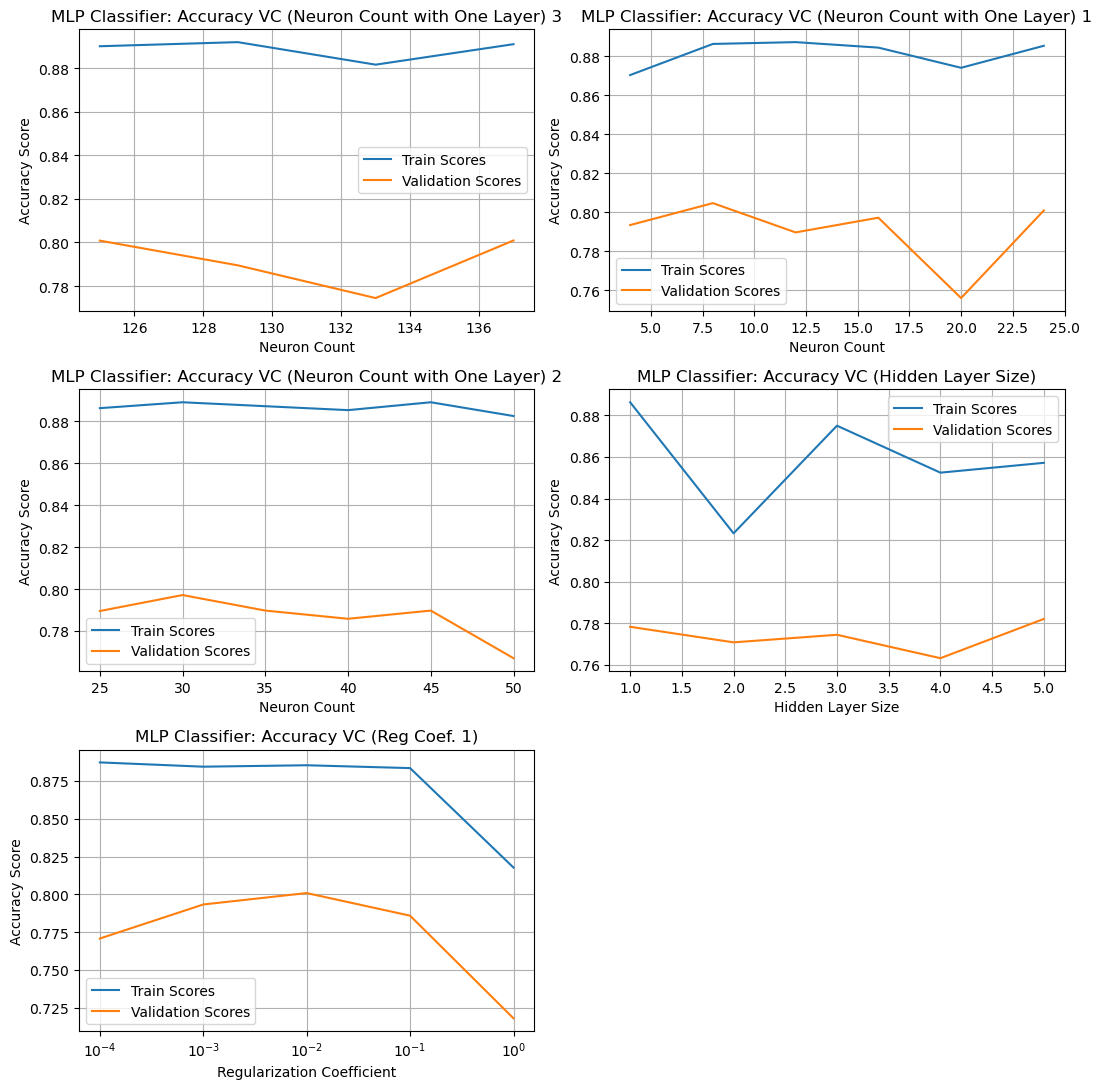

Exception ignored in: <function ResourceTracker.__del__ at 0x102dc9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102f31bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102461bc0>
Traceback (most recent call last

In [ ]:
# Create an even number of subplots (e.g., 3 rows, 2 columns for 5 plots)
fig, axs = plt.subplots(3, 2, figsize=(11,11))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in vc_dict.items():
    if value[2] == True:
        axs[count].semilogx(value[1], value[3][0], label=value[4][0])
        axs[count].semilogx(value[1], value[3][1], label=value[4][1])
    else:
        axs[count].plot(value[1], value[2][0], label=value[3][0])
        axs[count].plot(value[1], value[2][1], label=value[3][1])
    axs[count].set_xlabel(value[0][0])
    axs[count].set_ylabel(value[0][1])
    axs[count].set_title(key)
    axs[count].grid()
    axs[count].minorticks_off()
    axs[count].legend()
    count += 1

fig.delaxes(axs[count]) 
plt.tight_layout()
plt.show()

Pick some hyperparameters because none look too good and try other classifier models

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [83]:
pipeline = Pipeline(
    [
        ("clf", MLPClassifier(max_iter=2000, random_state=42)),
    ]
)

cv_params = {
    'clf__hidden_layer_sizes': [(50, 2), (100, 2), (150, 2)],
}
grid_search = GridSearchCV(pipeline, cv_params, cv=5, n_jobs=-1, scoring='accuracy', verbose=3)
grid_search.fit(X_train_processed, y_train)
best_model = grid_search.best_estimator_
display(best_model)
y_train_pred = best_model.predict(X_train_processed)
y_test_pred = best_model.predict(X_test_processed)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Training Accuracy after Hyperparameter Tuning: {train_accuracy:.4f}")
print(f"Testing Accuracy after Hyperparameter Tuning: {test_accuracy:.4f}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 2/5] END ...clf__hidden_layer_sizes=(50, 2);, score=0.868 total time=   0.3s
[CV 2/5] END ..clf__hidden_layer_sizes=(100, 2);, score=0.887 total time=   0.3s
[CV 5/5] END ...clf__hidden_layer_sizes=(50, 2);, score=0.755 total time=   0.3s
[CV 1/5] END ..clf__hidden_layer_sizes=(100, 2);, score=0.778 total time=   0.4s
[CV 1/5] END ...clf__hidden_layer_sizes=(50, 2);, score=0.759 total time=   0.4s
[CV 4/5] END ...clf__hidden_layer_sizes=(50, 2);, score=0.811 total time=   0.4s
[CV 3/5] END ...clf__hidden_layer_sizes=(50, 2);, score=0.717 total time=   0.4s
[CV 3/5] END ..clf__hidden_layer_sizes=(100, 2);, score=0.717 total time=   0.3s
[CV 4/5] END ..clf__hidden_layer_sizes=(100, 2);, score=0.774 total time=   0.2s
[CV 4/5] END ..clf__hidden_layer_sizes=(150, 2);, score=0.660 total time=   0.2s
[CV 5/5] END ..clf__hidden_layer_sizes=(100, 2);, score=0.811 total time=   0.3s
[CV 2/5] END ..clf__hidden_layer_sizes=(150, 2);,

Pipeline(steps=[('clf',
                 MLPClassifier(hidden_layer_sizes=(100, 2), max_iter=2000,
                               random_state=42))])

Best Hyperparameters: {'clf__hidden_layer_sizes': (100, 2)}
Training Accuracy after Hyperparameter Tuning: 0.8759
Testing Accuracy after Hyperparameter Tuning: 0.8657


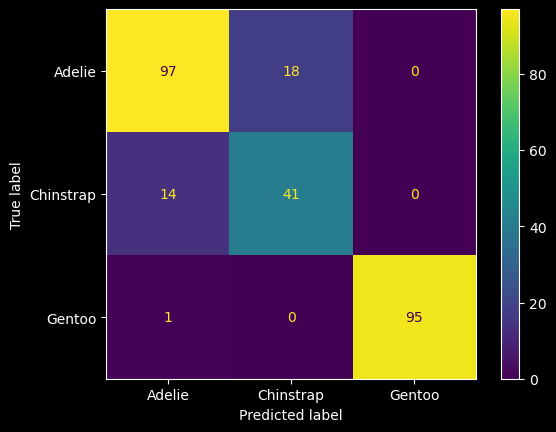

In [88]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

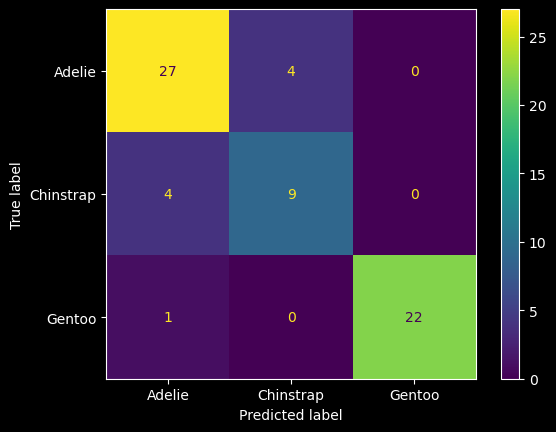

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)